## つまったので EDA
 - num_leaves 13 -> 7 とかにするとスコアが伸びた
     - 表現力が結構低いほうが良い -> データの質が悪い？
         - col が fake だったり？
             - np.nan に変換された feature の分布が２種類存在、元の分布と大きく異なるのとあまり変わらないの
                 - 大きく異なるのは real (データ数に比例してかぶり (non uniq) が増える)？
                 - データ数が多くなるとかぶり率が増えるから削られないが、データ数が少なくなると総数が少なくなるので分布上の数が少ない。率でみたい
         - np.nan が多い row が fake の可能性も？
 - 全 col を target encoding しても良さそう
     - var XX (categorical と言われているやつ) に絞っても良い？
 - 異常な peak が気になるよなぁ...
     - bin 切って count したい
     - 

## peak 見てみる

In [1]:
import sys
from tqdm import tqdm_notebook as tqdm

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sys.path.append('../')
from tools.utils.visualizations import num_feature_comp_hist
from tools.utils.configs import load_configs
from tools.utils.features import load_features

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
e015_configs = load_configs('../configs/c015.yml')
e015_features = load_features(e015_configs['features'], '../mnt/inputs/features/')

USED_CONFIG: ../configs/c015.yml
configs: {'train': {'fold_num': 10, 'fold_type': 'skf', 'sampling_type': 'none', 'os_lim': 1000000, 'sampling_random_state': 71, 'pos_t': 0, 'neg_t': 0, 'single_model': False, 'all_features': False, 'feature_selection': False, 'feature_select_path': 'importances/', 'metric': 'split_cov', 'feature_topk': 150}, 'lgbm_params': {'boosting': 'gbdt', 'boost_from_average': False, 'verbose': -1, 'random_state': 71, 'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.01, 'num_leaves': 13, 'max_depth': -1, 'subsample': 0.4, 'bagging_freq': 5, 'colsample_bytree': 0.05, 'min_data_in_leaf': 60, 'min_sum_hessian_in_leaf': 10.0, 'lambda_l1': 0.1, 'min_data_per_group': 1, 'cat_smooth': 750, 'cat_l2': 100, 'max_cat_to_onehot': 10}, 'features': ['ID_code', 'f010_non_uniq_masked_var_0', 'f010_non_uniq_masked_var_1', 'f010_non_uniq_masked_var_10', 'f010_non_uniq_masked_var_100', 'f010_non_uniq_masked_var_101', 'f010_non_uniq_masked_var_102', 'f010_non_uni

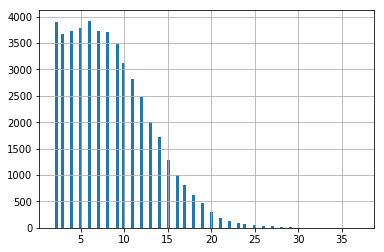

In [21]:
e015_features['f010_non_uniq_masked_var_9'].value_counts().hist(bins=100)

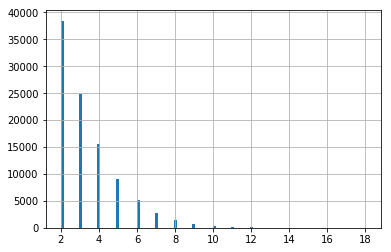

In [22]:
e015_features['f010_non_uniq_masked_var_10'].value_counts().hist(bins=100)

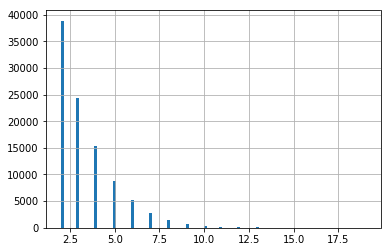

In [23]:
e015_features['f010_non_uniq_masked_var_11'].value_counts().hist(bins=100)

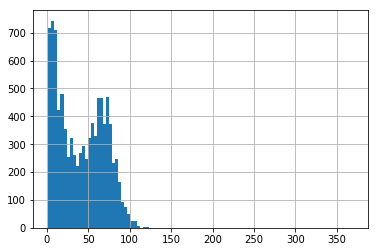

In [24]:
e015_features['f010_non_uniq_masked_var_12'].value_counts().hist(bins=100)

In [10]:
e015_features['f010_non_uniq_masked_var_103'].value_counts() # > 30

1.5367    112
1.4659    112
1.6323    109
1.4983    109
1.5883    109
1.6783    108
1.5443    106
1.5588    105
1.6025    105
1.6719    104
1.4583    103
1.6334    103
1.4168    103
1.6575    102
1.5736    102
1.6662    101
1.6490    101
1.4805    101
1.5323    101
1.5251    101
1.6429    101
1.4691    101
1.6249    101
1.4831    101
1.5754    100
1.4807    100
1.6052    100
1.5002    100
1.5123    100
1.5595    100
1.6460    100
1.4699     99
1.6045     99
1.6128     99
1.5305     99
1.5931     99
1.6458     99
1.4463     99
1.4724     99
1.5340     99
1.6818     99
1.6248     99
1.5950     98
1.6765     98
1.5910     98
1.5338     98
1.4817     98
1.5466     98
1.6724     98
1.6283     98
1.5377     98
1.5890     97
1.5999     97
1.5285     97
1.6478     97
1.4998     97
1.5824     97
1.6847     97
1.6276     97
1.5292     97
1.5299     96
1.6257     96
1.4712     96
1.6053     96
1.5586     96
1.5195     96
1.6948     96
1.5105     96
1.6803     96
1.5309     96
1.4570     96
1.6063

In [4]:
e015_features.nunique()

ID_code                         400000
f010_non_uniq_masked_var_0       82596
f010_non_uniq_masked_var_1       91935
f010_non_uniq_masked_var_10      99118
f010_non_uniq_masked_var_100     98659
f010_non_uniq_masked_var_101     97939
f010_non_uniq_masked_var_102     99246
f010_non_uniq_masked_var_103      9053
f010_non_uniq_masked_var_104     67130
f010_non_uniq_masked_var_105     37015
f010_non_uniq_masked_var_106     65319
f010_non_uniq_masked_var_107     99284
f010_non_uniq_masked_var_108      8444
f010_non_uniq_masked_var_109     93475
f010_non_uniq_masked_var_11      98420
f010_non_uniq_masked_var_110     88902
f010_non_uniq_masked_var_111     43887
f010_non_uniq_masked_var_112     57638
f010_non_uniq_masked_var_113     95752
f010_non_uniq_masked_var_114     40910
f010_non_uniq_masked_var_115     77839
f010_non_uniq_masked_var_116     59937
f010_non_uniq_masked_var_117     94409
f010_non_uniq_masked_var_118     99055
f010_non_uniq_masked_var_119     93677
f010_non_uniq_masked_var_